## RC Demo visualize scores

Goal: visualize the results dataframe from the single experiment.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
test_results_path = 'test_scores_single_2022_03_03.csv'
results = -pd.read_csv(test_results_path, index_col=['target', 'state_variable'])
results.head()

0         1         2         3         4  \
target    state_variable                                                     
input_Tac state_An        0.760317  0.759960  0.771159  0.863952  0.763795   
          state_E         0.930090  0.689037  0.728648  0.693773  0.704166   
          state_Eabs      0.775248  0.760211  0.786536  0.770726  0.787909   
          state_Ei        0.804914  0.779989  0.779155  0.786934  0.773832   
          state_Flux      0.703959  0.713499  0.710165  0.715610  0.695987   

                                 5         6         7         8         9  \
target    state_variable                                                     
input_Tac state_An        0.773623  0.826801  0.795141  0.765206  0.766943   
          state_E         0.881873  0.706255  0.699777  0.706416  0.715849   
          state_Eabs      0.773117  0.765655  0.791152  0.786109  0.760872   
          state_Ei        0.797410  0.772771  0.778218  0.783010  0.797316   
          state_Flux      0.692387  0.705610  0.698665  0.700075  0.722558   

                          ...        15        16        17        18  \
target    state_variable  ...                                           
input_Tac state_An        ...  0.749038  0.799609  0.773265  0.769829   
          state_E         ...  0.715987  0.696443  0.691448  0.714793   
          state_Eabs      ...  0.792459  0.779637  0.769522  0.766486   
          state_Ei        ...  0.784338  0.788909  0.779139  0.778623   
          state_Flux      ...  0.721573  0.725445  0.693214  0.699579   

                                19        20        21        22        23  \
target    state_variable                                                     
input_Tac state_An        0.826512  0.842570  0.777824  0.768252  0.759944   
          state_E         0.710691  0.710226  0.702552  0.702413  0.701105   
          state_Eabs      0.784973  0.775157  0.771141  0.798198  0.770514   
          state_Ei        0.791658  0.778057  0.776094  0.792732  0.783696   
          state_Flux      0.703595  0.703103  0.718593  0.731870  0.896186   

                                24  
target    state_variable            
input_Tac state_An        0.764784  
          state_E         0.691715  
          state_Eabs      0.780886  
          state_Ei        0.760749  
          state_Flux      0.702840  

[5 rows x 25 columns]

In [60]:
targets, state_vars = results.index.levels

print(f'   targets:  {len(targets)}')
print(f'state_vars:  {len(state_vars)}')

   targets:  8
state_vars:  11


### Box plots

Goal: make box plots as in Olivier's paper.

In [55]:
results.loc['output_Tleaf'].transpose().head()

len()

Index(['input_Rg', 'input_Tac', 'input_hs', 'input_u', 'output_An', 'output_E',
       'output_Rg', 'output_Tleaf'],
      dtype='object', name='target')

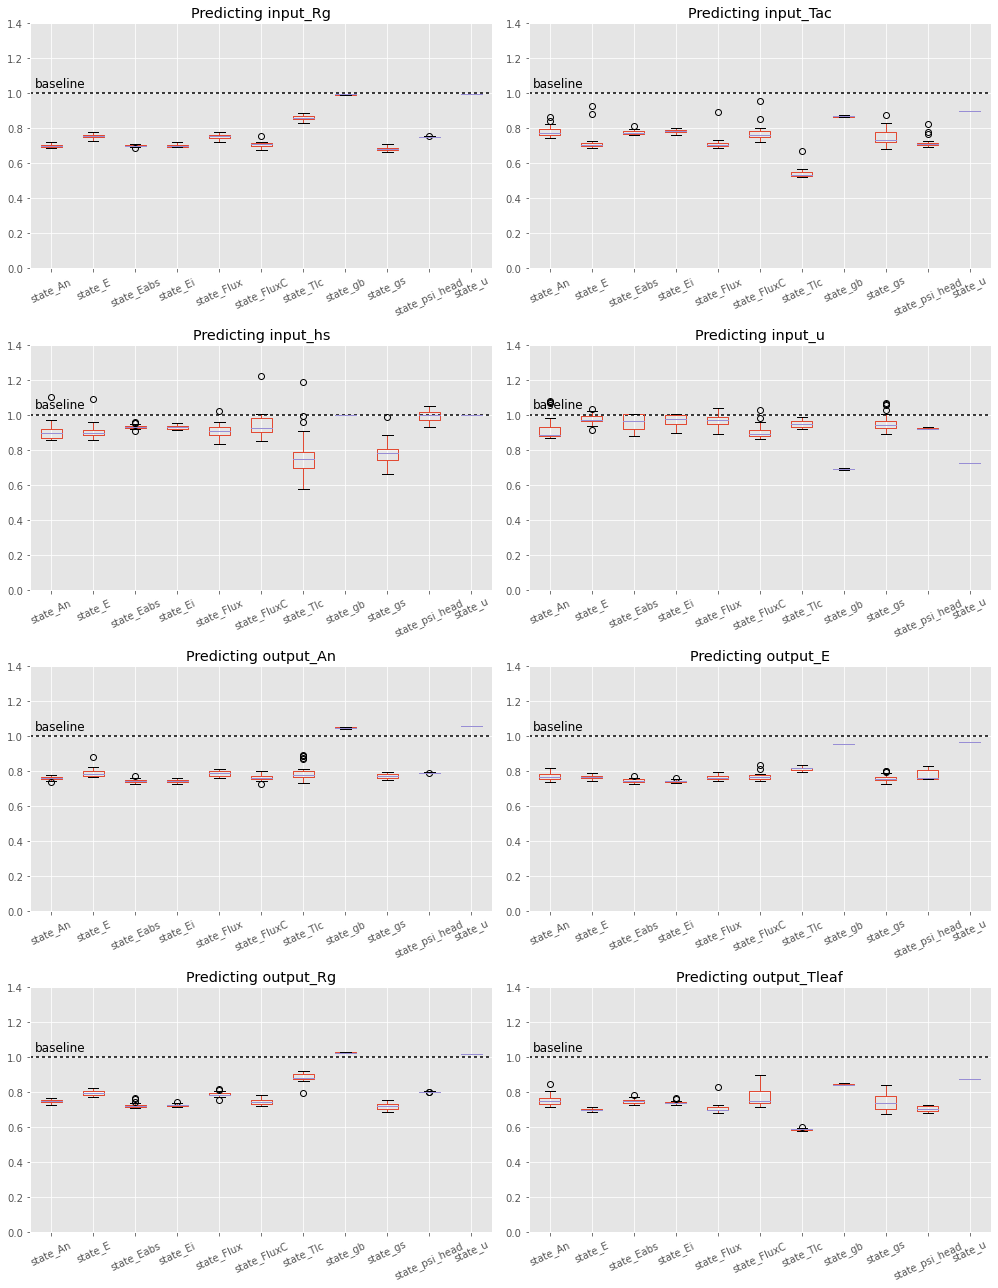

In [102]:
with plt.style.context('ggplot'):
	fig, ax = plt.subplots(4, 2, figsize=(14, 18), squeeze=False, tight_layout=True)
	for i_target, target in enumerate(targets):
		local_ax = ax[i_target // 2, i_target % 2]
		local_ax.axhline(1, dashes=(2, 2), color='black')
		local_ax.text(0.60, 1.035, 'baseline', fontsize='large')
		local_ax.set_ylim(0, 1.4)
		results.loc[target].transpose().boxplot(ax=local_ax, rot=25)
		local_ax.set_title(f'Predicting {target}')

	plt.show()